### Importing the Libraries

In [122]:
import numpy as np
import pandas as pd
import string

import nltk
nltk.download('punkt')
nltk.download('stopwords')
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize

import matplotlib.pyplot as plt
import seaborn as sns

import ipywidgets
from ipywidgets import interact

plt.rcParams['figure.figsize'] = (14, 8)
plt.style.use('fivethirtyeight')

import warnings
warnings.filterwarnings("ignore")

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


### Reading the Data

In [123]:
# reading the Dataset
data = pd.read_csv('/content/drugsComTest_raw.csv')

# lets print the dimension of the dataset
print("The Shape of the Dataset :", data.shape)

The Shape of the Dataset : (53766, 7)


In [124]:
# lets check the head of the dataset
data.head()

,uniqueID,drugName,condition,review,rating,date,usefulCount
0,163740,Mirtazapine,Depression,"""I&#039;ve tried a few antidepressants over th...",10,28-Feb-12,22
1,206473,Mesalamine,"Crohn's Disease, Maintenance","""My son has Crohn&#039;s disease and has done ...",8,17-May-09,17
2,159672,Bactrim,Urinary Tract Infection,"""Quick reduction of symptoms""",9,29-Sep-17,3
3,39293,Contrave,Weight Loss,"""Contrave combines drugs that were used for al...",9,5-Mar-17,35
4,97768,Cyclafem 1 / 35,Birth Control,"""I have been on this birth control for one cyc...",9,22-Oct-15,4


In [125]:
# lets check the tail of the dataset
data.tail()

,uniqueID,drugName,condition,review,rating,date,usefulCount
53761,159999,Tamoxifen,"Breast Cancer, Prevention","""I have taken Tamoxifen for 5 years. Side effe...",10,13-Sep-14,43
53762,140714,Escitalopram,Anxiety,"""I&#039;ve been taking Lexapro (escitaploprgra...",9,8-Oct-16,11
53763,130945,Levonorgestrel,Birth Control,"""I&#039;m married, 34 years old and I have no ...",8,15-Nov-10,7
53764,47656,Tapentadol,Pain,"""I was prescribed Nucynta for severe neck/shou...",1,28-Nov-11,20
53765,113712,Arthrotec,Sciatica,"""It works!!!""",9,13-Sep-09,46


In [126]:
# lets Explore Some of the Important Column in the dataset

print("Number of Unique Drugs present in the Dataset :", data['drugName'].nunique())
print("Number of Unique Medical Conditions present in the Dataset :", data['condition'].nunique())

print()
print("The Time Period of Collecting the Data")
print("Starting Date :", data['date'].min())
print("Ending Date :", data['date'].max())

Number of Unique Drugs present in the Dataset : 2637
Number of Unique Medical Conditions present in the Dataset : 708

The Time Period of Collecting the Data
Starting Date : 1-Apr-08
Ending Date : 9-Sep-17


### Summarizing the Dataset

In [127]:
# lets summarize the Dataset
data[['rating','usefulCount']].describe()

,rating,usefulCount
count,53766.000000,53766.000000
mean,6.976900,27.989752
std,3.285207,36.172833
min,1.000000,0.000000
25%,4.000000,6.000000
50%,8.000000,16.000000
75%,10.000000,36.000000
max,10.000000,949.000000


In [128]:
# lets check the Number and Name of the Drugs with 0 Useful Count in Details
print("Analysis on Useless Drugs")
print("----------------------------")
print("The Number of Drugs with No Useful Count :", data[data['usefulCount'] == 0].count()[0])

# Lets Check the Number of Drugs with No Usesful Count with Review Greater than or Equal to 8
print("Number of Good Drugs with Lesser Useful Count :", data[(data['usefulCount'] == 0) &
                                                data['rating'] >= 8].count()[0])

# Lets Check the Average Rating of the Drugs with No Useful Count
print("Average Rating of Drugs with No Useful Count : {0:.2f}".format(data[data['usefulCount'] == 0]['rating'].mean()))

print("\nAnalysis on Useful Drugs")
print("----------------------------")
print("The Number of Drugs with Greater than 1000 Useful Counts :", data[data['usefulCount'] > 1000].count()[0])
print("Average Rating of Drugs with 1000+ Useful Counts :", data[data['usefulCount'] > 1000]['rating'].mean())
print("\nName and Condition of these Drugs: \n\n", 
    data[data['usefulCount'] > 1000][['drugName','condition']].reset_index(drop = True))

Analysis on Useless Drugs
----------------------------
The Number of Drugs with No Useful Count : 2084
Number of Good Drugs with Lesser Useful Count : 0
Average Rating of Drugs with No Useful Count : 5.87

Analysis on Useful Drugs
----------------------------
The Number of Drugs with Greater than 1000 Useful Counts : 0
Average Rating of Drugs with 1000+ Useful Counts : nan

Name and Condition of these Drugs: 

 Empty DataFrame
Columns: [drugName, condition]
Index: []


In [129]:
# lets summarize Categorical data also
data[['drugName','condition','review']].describe(include = 'object')

,drugName,condition,review
count,53766,53471,53766
unique,2637,708,48280
top,Levonorgestrel,Birth Control,"""Good."""
freq,1273,9648,8


In [130]:
# lets check for Missing Values
data.isnull().sum()

uniqueID         0
drugName         0
condition      295
review           0
rating           0
date             0
usefulCount      0
dtype: int64

In [131]:
# as we know that condition is an Important Column, so we will delete all the records where Condition is Missing
data = data.dropna()

In [132]:
# lets check the Missing values now
data.isnull().sum()

uniqueID       0
drugName       0
condition      0
review         0
rating         0
date           0
usefulCount    0
dtype: int64

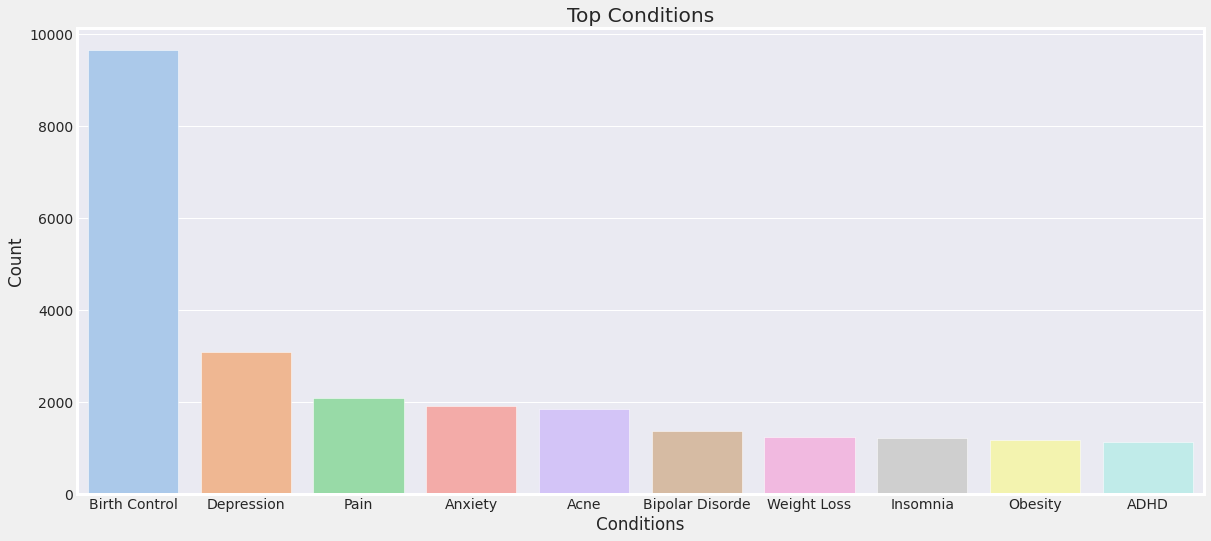

In [133]:
# plotting the top 10 conditions

conditions = dict(data['condition'].value_counts())
top_conditions = list(conditions.keys())[0:10]
values = list(conditions.values())[0:10]
plt.figure(figsize=(18,8))
sns.set_style(style='darkgrid')
sns.barplot(x=top_conditions,y=values,palette="pastel")
plt.title('Top Conditions')
plt.xlabel('Conditions')
plt.ylabel('Count')
plt.show()

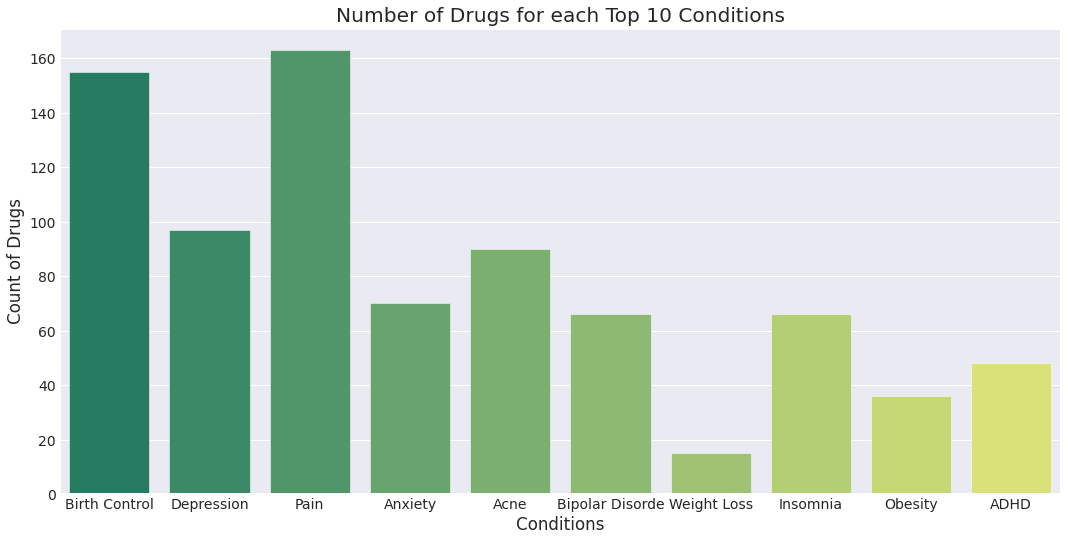

In [134]:
# plotting number of drugs for top 10 condition
val=[]
for c in list(conditions.keys()):
    val.append(data[data['condition']==c]['drugName'].nunique())
drug_cond = dict(zip(list(conditions.keys()),val))    
top_conditions = list(drug_cond.keys())[0:10]
values = list(drug_cond.values())[0:10]
plt.figure(figsize=(16,8))
sns.set_style(style='darkgrid')
sns.barplot(x=top_conditions,y=values,palette='summer')
plt.title('Number of Drugs for each Top 10 Conditions')
plt.xlabel('Conditions')
plt.ylabel('Count of Drugs')
plt.show()

### Unveiling Hidden Patterns from the Data

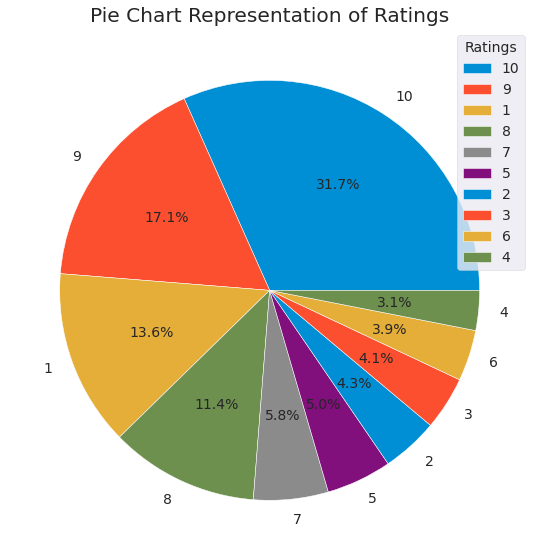

In [135]:
#plotting the percentage distribution of ratings using pie chart

ratings_count = dict(data['rating'].value_counts())
count = list(ratings_count.values())
labels = list(ratings_count.keys())
plt.figure(figsize=(18,9))
plt.pie(count,labels=labels, autopct='%1.1f%%')
plt.title('Pie Chart Representation of Ratings')
plt.legend(title='Ratings')
plt.show()

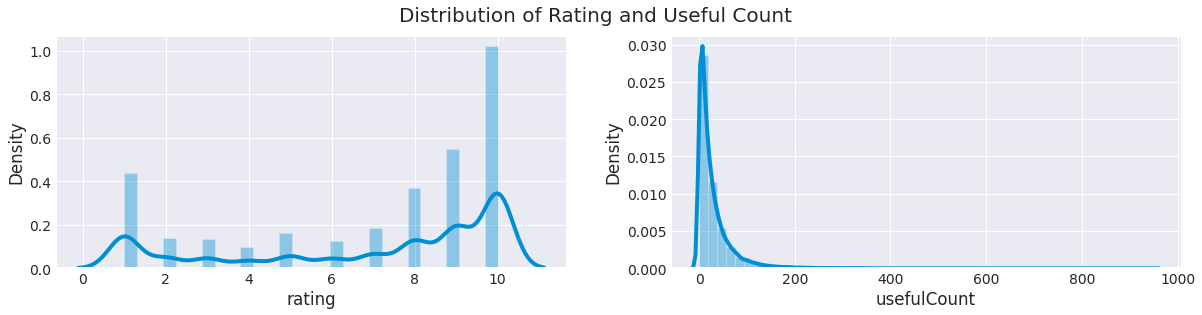

In [136]:
# lets check the Distribution of Rating and Useful Count

plt.rcParams['figure.figsize'] = (18, 4)

plt.subplot(1, 2, 1)
sns.distplot(data['rating'])

plt.subplot(1, 2, 2)
sns.distplot(data['usefulCount'])

plt.suptitle('Distribution of Rating and Useful Count \n ', fontsize = 20)
plt.show()

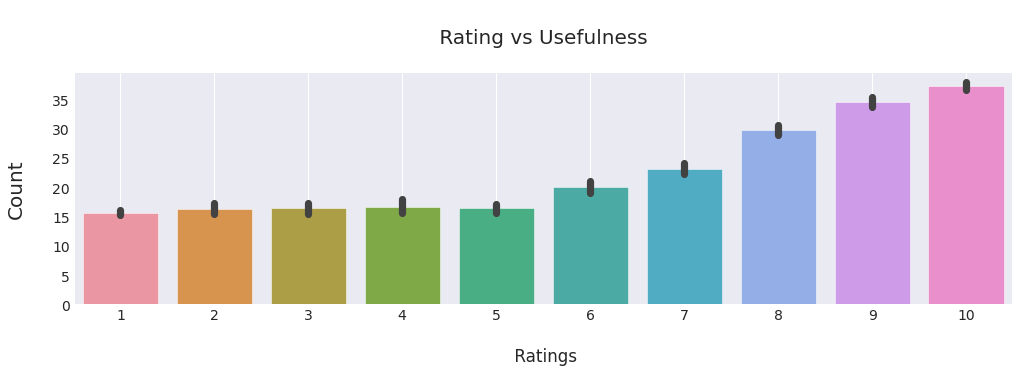

In [137]:
# lets check the Impact of Ratings on Usefulness

plt.rcParams['figure.figsize'] = (15, 4)
sns.barplot(data['rating'], data['usefulCount'])
plt.grid()
plt.xlabel('\n Ratings')
plt.ylabel('Count\n', fontsize = 20)
plt.title('\n Rating vs Usefulness \n', fontsize = 20)
plt.show()

In [138]:
# Checking whether Length of Review has any Impact on Ratings of the Drugs

# for that we need to create a new column to calculate length of the reviews
data['len']  = data['review'].apply(len)

In [139]:
# lets check the Impact of Length of Reviews on Ratings
data[['rating','len']].groupby(['rating']).agg(['min','mean','max'])

len                  
       min        mean   max
rating                      
1        5  427.267447  3103
2       14  458.453959  2376
3        8  449.259445  2142
4        5  468.612667  1558
5       10  480.199926  2010
6        4  471.655566  2202
7        6  482.972358  1266
8        6  479.849134  1603
9        3  476.221930  2733
10       6  445.299994  6192

### Cleaning the Reviews

In [140]:
# as it is clear that the reviews have so many unnecassry things such as Stopwords, Punctuations, numbers etc

# First lets remove Punctuations from the Reviews
def punctuation_removal(messy_str):
    clean_list = [char for char in messy_str if char not in string.punctuation]
    clean_str = ''.join(clean_list)
    return clean_str

data['review'] = data['review'].apply(punctuation_removal)

In [141]:
# Now lets Remove the Stopwords also

stop = stopwords.words('english')
stop.append("i'm")

stop_words = []

for item in stop: 
    new_item = punctuation_removal(item)
    stop_words.append(new_item) 

def stopwords_removal(messy_str):
    messy_str = word_tokenize(messy_str)
    return [word.lower() for word in messy_str 
            if word.lower() not in stop_words ]

data['review'] = data['review'].apply(stopwords_removal)

In [142]:
# lets remove the Numbers also

import re
def drop_numbers(list_text):
    list_text_new = []
    for i in list_text:
        if not re.search('\d', i):
            list_text_new.append(i)
    return ' '.join(list_text_new)

data['review'] = data['review'].apply(drop_numbers)

### Calculating the Sentiment from Reviews

In [143]:
# for using Sentiment Analyzer we will have to dowload the Vader Lexicon from NLTK
nltk.download('vader_lexicon')

[nltk_data] Downloading package vader_lexicon to /root/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


True

In [144]:
# lets calculate the Sentiment from Reviews

from nltk.sentiment.vader import SentimentIntensityAnalyzer
sid = SentimentIntensityAnalyzer()
train_sentiments = []
for i in data['review']:
    train_sentiments.append(sid.polarity_scores(i).get('compound'))
    
train_sentiments = np.asarray(train_sentiments)
data['sentiment'] = pd.Series(data=train_sentiments)

In [145]:
# lets check Impact of Sentiment on Reviews
data[['rating','sentiment']].groupby(['rating']).agg(['min','mean','max'])

sentiment                  
             min      mean     max
rating                            
1        -0.9938 -0.011343  0.9935
2        -0.9946 -0.000385  0.9833
3        -0.9919 -0.005612  0.9864
4        -0.9914 -0.029316  0.9850
5        -0.9876  0.014860  0.9814
6        -0.9894  0.008093  0.9828
7        -0.9916 -0.012391  0.9884
8        -0.9936  0.009604  0.9935
9        -0.9982  0.012665  0.9882
10       -0.9949  0.006805  0.9911

In [146]:
# as we can see that Sentiment and length of the review are not related to Reviews, we will drop the sentiment column

# lets remove the unique Id, date, review, len, and sentiment column also
data = data.drop(['date','uniqueID','sentiment','review','len'], axis = 1)

# lets check the name of columns now
data.columns

Index(['drugName', 'condition', 'rating', 'usefulCount'], dtype='object')

### Calculating Effectiveness and Usefulness of Drugs

In [147]:
# Lets Calculate an Effective Rating

min_rating = data['rating'].min()
max_rating = data['rating'].max()

def scale_rating(rating):
    rating -= min_rating
    rating = rating/(max_rating -1)
    rating *= 5
    rating = int(round(rating,0))
    
    if(int(rating) == 0 or int(rating)==1 or int(rating)==2):
        return 0
    else:
        return 1
    
data['eff_score'] = data['rating'].apply(scale_rating)

In [148]:
# lets also calculate Usefulness Score
data['usefulness'] = data['rating']*data['usefulCount']*data['eff_score']

# lets check the Top 10 Most Useful Drugs with their Respective Conditions
data[['drugName','condition','usefulness']][data['usefulness'] > 
                            data['usefulness'].mean()].sort_values(by = 'usefulness', 
                                        ascending = False).head(10).reset_index(drop = True)

,drugName,condition,usefulness
0,Sertraline,Depression,8541
1,Etonogestrel,Birth Control,7300
2,Sertraline,Depression,6800
3,Oxycodone,Pain,6255
4,OxyContin,Pain,6255
5,Cymbalta,Depression,6210
6,Sertraline,Depression,5796
7,Buspirone,Anxiety,5265
8,Citalopram,Depression,5031
9,Prozac,Anxiety and Stress,4860


### Analyzing the Medical Condtitions

In [149]:
# lets calculate the Number of Useless and Useful Drugs for Each Condition

def check(condition = list(data['condition'].value_counts().index)):
    return data[data['condition'] == condition]['eff_score'].value_counts()

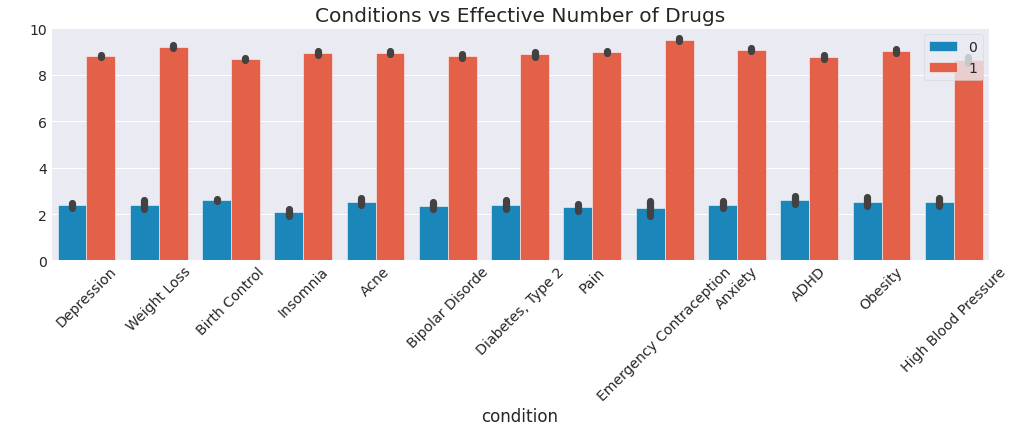

In [150]:
# lets check this in Graph, 

popular_conditions = ('Birth Control','Depression','Pain','Anxiety','Acne','Bipolar Disorde','Insomnia','Weight Loss',
                      'Obesity','ADHD', 'Diabetes, Type 2', 'Emergency Contraception', 'High Blood Pressure','Migrane')
conditions = data.loc[data['condition'].isin(popular_conditions)]

sns.barplot(x = conditions['condition'], y = conditions['rating'], hue = data['eff_score'])
plt.title('Conditions vs Effective Number of Drugs')
plt.xticks(rotation = 45)
plt.ylabel(' ')
plt.legend(loc='upper right')
plt.show()

In [151]:
# lets check the Most Common Conditions

print("Number of Unique Conditions :", data['condition'].nunique())
data['condition'].value_counts().head(10)

Number of Unique Conditions : 708


Birth Control      9648
Depression         3095
Pain               2100
Anxiety            1908
Acne               1847
Bipolar Disorde    1380
Weight Loss        1248
Insomnia           1231
Obesity            1189
ADHD               1126
Name: condition, dtype: int64

In [152]:
# lets check Drugs, which were useful to Highest Number of Poeple
data[['drugName','usefulCount']][data['usefulCount'] >
                    data['usefulCount'].mean()].sort_values(by = 'usefulCount',
                                        ascending = False).head(10).reset_index(drop = True)

,drugName,usefulCount
0,Sertraline,949
1,Etonogestrel,730
2,OxyContin,695
3,Oxycodone,695
4,Sertraline,680
5,Sertraline,644
6,Cymbalta,621
7,Buspirone,585
8,Citalopram,559
9,Vilazodone,513


### Finding Most Useful and Useless Drugs for each Condition

In [159]:
# lets remove all the Duplicates from the Dataset
data = data.drop_duplicates()

In [160]:
data.shape

(43874, 6)

In [161]:
# lets find the Highest and Lowest Rated Drugs for each Condition

def high_low_rate(condition = list(data['condition'].value_counts().index)):
    print("\n Top 5 Drugs")
    print(data[data['condition'] == condition][['drugName','usefulness']].sort_values(by = 'usefulness',
                                                 ascending = False).head().reset_index(drop = True))
    print("\n\n Bottom 5 Drugs")
    print(data[data['condition'] == condition][['drugName','usefulness']].sort_values(by = 'usefulness',
                                                 ascending = True).head().reset_index(drop = True))